# Mall Customer Segmentation using K-Means

In this notebook we perform **unsupervised learning** using the K-Means clustering algorithm
on a mall customer dataset.

We will cover:

1. Importing libraries  
2. Loading the dataset  
3. Selecting features (Annual Income & Spending Score)  
4. Using the **Elbow Method** to choose number of clusters  
5. Fitting K-Means  
6. Visualizing clusters and centroids  


## 1. Import libraries

We import `pandas` for data handling, `matplotlib` for plotting,
and `KMeans` from `sklearn` for clustering.


In [2]:
# Import libraries we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## 2. Load the dataset

We read the `Mall_Customers.csv` file into a pandas DataFrame so we can
work with the data easily.


In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Asus\Ethans\ml\kmeansc\Mall_Customers.csv")
df.head()  # quick look at first 5 rows


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Select features for clustering

From the full dataset we pick only two columns:

- **Annual Income (k$)**
- **Spending Score (1-100)**

Using two features lets us draw a simple **2D scatter plot** of the clusters.


In [4]:
# Select only the columns we want to use for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()  # preview selected features


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 4. Choose number of clusters with the Elbow Method

We fit K-Means for different values of **k** (number of clusters) and record the
**inertia** (how compact the clusters are). Then we look for the *elbow* point in the plot,
where increasing k further does not give much improvement.

What is Inertia/WCSS?

WCSS = Within Cluster Sum of Squares

Inertia = The total sum of squared distances between each data point and the centroid of the cluster it belongs to.

Simple meaning:

For every point, we calculate how far it is from its cluster’s centroid, square that distance, and then add all those values together.

Smaller inertia = tighter & better clusters.

“Inertia tells us how compact and well-formed the clusters are.
It is calculated by summing the squared distance from each point to its centroid.

As we increase k, inertia decreases, but after a certain point the improvement becomes very small — that turning point is called the elbow, and that is the best choice for k.”

Taking too few clusters does not group the data properly.

Taking too many clusters creates an overfitting-like situation.

The Elbow Method helps to find the right balance.


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

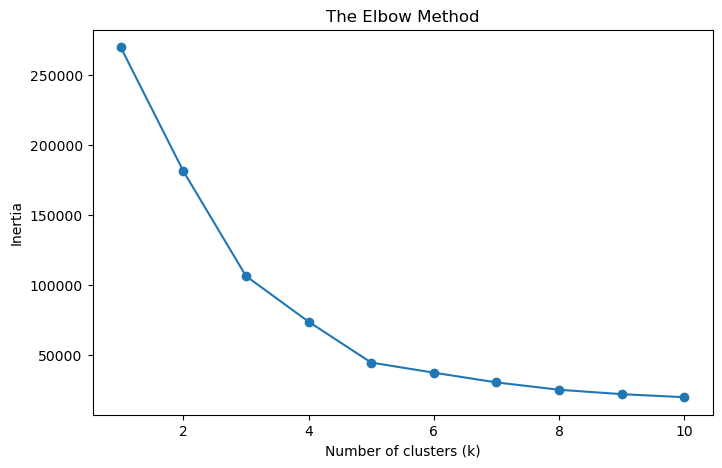

In [5]:
# Elbow method: try different k values and record inertia for each
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


## 5. Fit K-Means with chosen number of clusters

Based on the elbow plot, we select a value for `k` (for example, **k = 5**) and
fit a final K-Means model. We then add the resulting cluster labels back to the original DataFrame.


In [6]:
# Fit final KMeans model with chosen k and add cluster labels to the data
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)  # cluster index for each row
df['Cluster'] = y_kmeans
df.head()


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


## 6. Visualize clusters and centroids

We draw a scatter plot of **Annual Income vs Spending Score** where each
point is colored by its cluster. The **centroids** are shown with a big `X` marker.


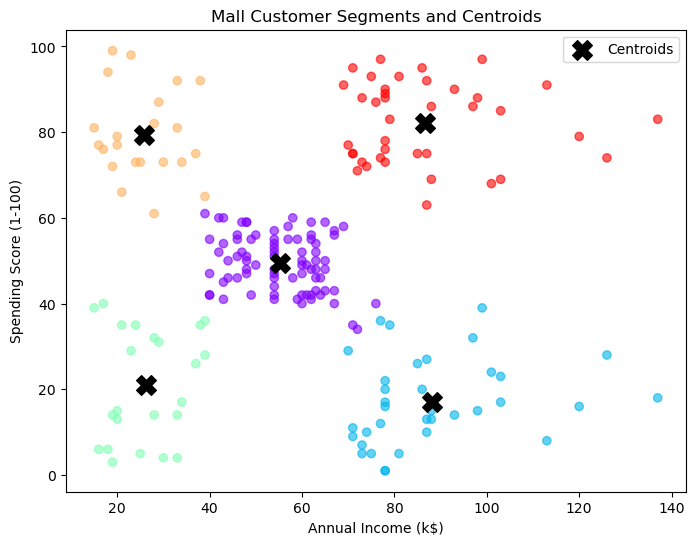

In [7]:
# Visualize clusters with centroids
plt.figure(figsize=(8, 6))
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=y_kmeans,
    cmap='rainbow',
    alpha=0.6,
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='black',
    marker='X',
    s=200,
    label='Centroids',
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segments and Centroids')
plt.legend()
plt.show()
